**1. 1차원데이터분석**

**1.** **변수종류파악( 수치형/ 범주형/ 시간형)**

**2.** **변수종류별분석지표( 수치형/ 범주형/ 시간형)**

**3.** **시각화**

- **도수분포표/ 히스토그램/ 상자그림**

**2. 2차원데이터분석**

**1.** **공분산/ 상관계수**

**2.** **다중공선성확인**

**3.** **시각화**

- **산점도/ 회귀직선/ 히트맵**

출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

- airline : 항공사
- carrier_deay : 항공사 지연 요인
- atc_delay : ATC 항공교통관제 지연 요인
- weather_delay : 날씨로 인한 지연 요인

In [4]:
import pandas as pd 
df = pd.read_csv('data/airline_stats.csv')
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


# 1차원 데이터 분석

In [40]:
# 1. 데이터 타입 확인 
# 2. 수치형 3개, 범주형 1개로 확인 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


| 변수명                 | 데이터 타입  | 변수 종류                  |
| ------------------- | ------- | ---------------------- |
| `pct_carrier_delay` | float64 | **수치형** (항공사 자체 지연 비율) |
| `pct_atc_delay`     | float64 | **수치형** (관제 지연 비율)     |
| `pct_weather_delay` | float64 | **수치형** (날씨 지연 비율)     |
| `airline`           | object  | **범주형** (항공사명)         |


In [41]:
df.head(3) # 대략적인 값들 확인 

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American


In [43]:
num_df = df.select_dtypes(include='number').head() # 수치형

In [26]:
# 범주형 변수의 데이터 건수 
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

## 변수 종류별 분석 지표

1. 수치형 (항공사 자체 지연비율, 관제 지연 비율, 날씨 지연 비율)
2. 범주형 (항공사명)

In [45]:
# 전체 수치형 변수 기초 통계량 
num_df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,5.000000,5.000000,5.000000
mean,8.140751,4.556607,1.229775
std,2.347923,3.680866,0.835070
min,5.959924,1.971774,0.000000
25%,7.157270,2.706231,0.762097
50%,7.333333,3.365591,1.585878
75%,8.153226,3.706107,1.774194
max,12.100000,11.033333,2.026706


In [ ]:
# 항공사 지연 요인 - 비슷한 데이터 값끼리(아메리칸, 사우스웨스트, 유나이티드)
num_df1 = df.groupby('airline')['pct_carrier_delay'].describe().T.loc[:, ['American', 'Southwest', 'United']]

In [ ]:
# 항공사 지연 요인 - 비슷한 값 기준끼리 (알래스카, 제트블루)
num_df2 = df.groupby('airline')['pct_carrier_delay'].describe().T.loc[:, ['Alaska', 'Jet Blue']]

In [48]:
# 전체 지연 요인 - (아메리칸, 사우스웨스트, 유나이티드)
df.groupby('airline').describe().T.loc[:, ['American', 'Southwest', 'United']]

airline                     American    Southwest       United
pct_carrier_delay count  5723.000000  5584.000000  5414.000000
                  mean      9.042180     7.521997     7.398833
                  std       4.139067     3.345085     5.369283
                  min       0.000000     0.000000     0.000000
                  25%       6.338538     5.070294     4.034708
                  50%       8.428571     6.960930     6.445210
                  75%      10.988763     9.354839     9.633110
                  max      50.000000    24.800000   100.000000
pct_atc_delay     count  5723.000000  5584.000000  5414.000000
                  mean      5.993529     3.147019     5.348133
                  std       4.647170     2.513162     4.992464
                  min       0.000000     0.000000     0.000000
                  25%       3.108403     1.612527     2.431308
                  50%       4.986523     2.559242     4.353647
                  75%       7.594450     3.790421     7.030109
                  max      60.000000    21.542722   100.000000
pct_weather_delay count  5723.000000  5584.000000  5414.000000
                  mean      1.122920     0.512611     0.680697
                  std       1.097811     0.649631     1.338433
                  min       0.000000     0.000000     0.000000
                  25%       0.296719     0.105675     0.000000
                  50%       0.884354     0.305598     0.263780
                  75%       1.641725     0.663306     0.861395
                  max      12.500000     6.240987    33.333333

C:\Users\Admin\AppData\Local\Temp\ipykernel_28332\2913440298.py:15: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 공백제거
C:\Users\Admin\AppData\Local\Temp\ipykernel_28332\2913440298.py:15: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 공백제거
C:\Users\Admin\AppData\Local\Temp\ipykernel_28332\2913440298.py:15: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 공백제거
c:\Users\Admin\miniconda3\envs\hipython\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\miniconda3\envs\hipython\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\miniconda3\

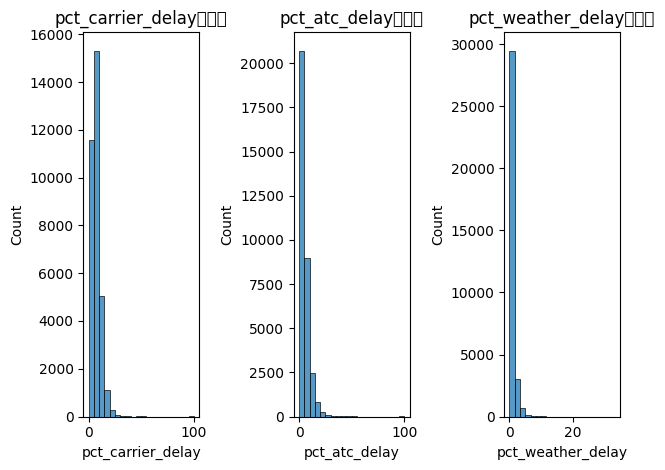

In [64]:
numeric_columns = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']

import seaborn as sns 
import matplotlib.pyplot as plt

# 수치형 변수의 히스토그램
plt.figure()
for i, col in enumerate(numeric_columns, start=1):

    plt.subplot(1, 3, i)
    sns.histplot(df[col],bins=20, kde=False)
    plt.title(f"{col}분포도")


plt.tight_layout() # 공백제거
plt.show() # 그래프 보여주는 거 

C:\Users\Admin\AppData\Local\Temp\ipykernel_28332\187936820.py:21: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 공백제거
C:\Users\Admin\AppData\Local\Temp\ipykernel_28332\187936820.py:21: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 공백제거
C:\Users\Admin\AppData\Local\Temp\ipykernel_28332\187936820.py:21: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 공백제거
C:\Users\Admin\AppData\Local\Temp\ipykernel_28332\187936820.py:21: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 공백제거
c:\Users\Admin\miniconda3\envs\hipython\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\miniconda3\envs\hipython\Lib\site-packages\IPyt

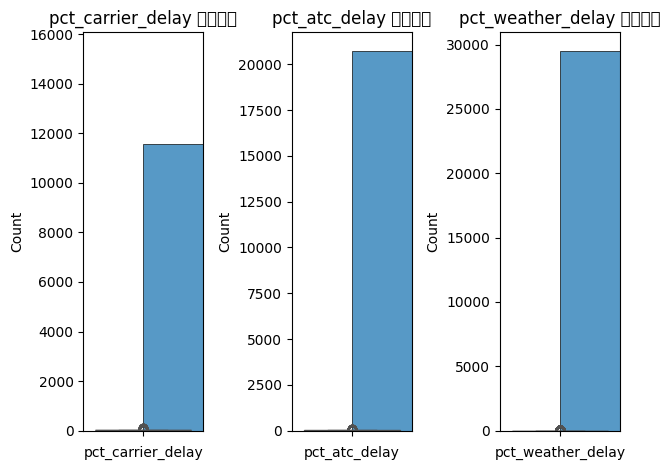

In [ ]:
# 히스토그램

numeric_columns = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']

import seaborn as sns 
import matplotlib.pyplot as plt

# 수치형 변수의 히스토그램
plt.figure()
for i, col in enumerate(numeric_columns, start=1):

    plt.subplot(1, 3, i)
    sns.histplot(df[col],bins=20, kde=False)
    plt.title(f"{col}분포도")
    
    plt.subplot(1,3,i)
    sns.boxplot(df[col])
    plt.title(f"{col} 박스플롯")


plt.tight_layout() # 공백제거
plt.show() # 그래프 보여주는 거 

In [25]:
print(
df.iloc[:,0].mode(),
df.iloc[:,1].mode(),
df.iloc[:,2].mode()
)

0    0.0
Name: pct_carrier_delay, dtype: float64 0    0.0
Name: pct_atc_delay, dtype: float64 0    0.0
Name: pct_weather_delay, dtype: float64
